## Introdução

Olá cientista de dados! E nesta aula, vamos explorar uma técnica para analisar variáveis qualitativas.

## Problema

Foi solicitado que você faça uma análise comparativa dos pokemons baseados em seu poder de ataque. Naturalmente, pensamos que um simples gráfico de barras ou colunas pode resolver essa situação, mas com o grande número de pokemons que temos (˜1000) o gráfico ficaria muito extenso. Então, como mostrar essa comparação?

Entra aí a word cloud, ou nuvem de palavras. A nuvem de palavras vai mostrar palavras com tamanho variável, geralmente de acordo com a frequência da ocorrência da palavra no corpo de texto. Então, vamos considerar que o nosso corpo de texto é a lista de nomes de pokemon, e o poder ataque indica a frequência de cada um. Se formatado corretamente, podemos utilizar e garantimos que todos os pokemons aparecerão em uma tela.

Mas o seaborn faz isso? Não, teremos que introduzir mais uma biblioteca, desta vez chamada wordcloud. No código abaixo, acompanhe o passo a passo para gerar a word cloud.

## Passo a Passo

Vamos compor nossa solução, pedaço por pedaço. Como sempre, o primeiro passo é carregar nossas bibliotecas. Como a biblioteca wordcloud é nova, antes precisamos instala-la. Isso é feito com o seguinte comando:

```shell
$ pip install wordcloud
```

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# Biblioteca wordcloud - No google colab ela já está disponível. 
# Se for usar em seu computador, instale antes com o seguinte comando:
# pip install wordcloud
from wordcloud import STOPWORDS, ImageColorGenerator, WordCloud

Agora, vamos a configuração.

In [11]:
# Definindo a nossa paleta de cores - vamos utilizar nossas próprias cores
cores = ["#0c4f6a", "#177498", "#0a8faa", "#bfdce5", "#82bd4a", "#b8d67a",
         "#b2b3b6", "#58585a", "#edb634", "#d97933", "#f1bdb1", "#eca091",
         "#e26c54", "#b0391e"]

# Tamanho da Imagem
# Este tamanho é em polegadas
# O primeiro valor é Largura e o segundo, Altura
plt.rcParams["figure.figsize"]=(12,12)

# Resolução da Imagem
# 300 dpi é o padrão mínimo para impressão
# Aqui vamos usar um pouco menos
plt.rcParams["figure.dpi"] = 300
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.format"] = "svg"

# Removendo Bordas em torno do gráfico
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.bottom"] = False
plt.rcParams["axes.spines.left"] = False

# Carregando a paleta de cores
sns.set_palette(sns.color_palette(cores))

A próxima etapa é carregar os dados.

In [5]:
# carregando os dados da internet
df = pd.read_csv('https://github.com/labeduc/datasets/blob/main/pokemons/all.csv?raw=true')

df.sample(5)

Number          Name   Type 1 Type 2  \
609     517         Munna  Psychic    NaN   
194     151           Mew  Psychic    NaN   
750     646  Black Kyurem   Dragon    Ice   
571     481       Mesprit  Psychic    NaN   
703     605        Elgyem  Psychic    NaN   

                                    Abilities   HP  Att  Def  Spa  Spd  ...  \
609  ['Forewarn', 'Synchronize', 'Telepathy']   76   25   45   67   55  ...   
194                           ['Synchronize']  100  100  100  100  100  ...   
750                              ['Teravolt']  125  170  100  120   90  ...   
571                              ['Levitate']   80  105  105  105  105  ...   
703  ['Analytic', 'Synchronize', 'Telepathy']   55   55   55   85   55  ...   

     Against Bug  Against Rock  Against Ghost  Against Dragon  Against Dark  \
609          2.0           1.0            2.0             1.0           2.0   
194          2.0           1.0            2.0             1.0           2.0   
750          1.0           2.0            1.0             2.0           1.0   
571          2.0           1.0            2.0             1.0           2.0   
703          2.0           1.0            2.0             1.0           2.0   

    Against Steel  Against Fairy  Height  Weight   BMI  
609           1.0            1.0     0.6    23.3  64.7  
194           1.0            1.0     0.4     4.0  25.0  
750           2.0            2.0     3.3   325.0  29.8  
571           1.0            1.0     0.3     0.3   3.3  
703           1.0            1.0     0.5     9.0  36.0  

[5 rows x 44 columns]

E o último passo antes de plotar o gráfico é transformar os dados. A transformação que iremos fazer é a seguinte: para cada pokemon, temos o poder de ataque. Esta biblioteca wordcloud funciona de dois modos: podemos gerar a imagem a partir de um texto, e ele fará a quebra, removerá stopwords, e calculará a frequencia, ou passamos para ele um dicionário de frequências. Vamos optar por este último, por fazer mais sentido com os dados que temos. 

In [7]:
lista = {}
for idx, row in df.iterrows():
  lista[row['Name']] = row['Att']


E finalmente, chamamos a biblioteca e fazemos a plotagem com o auxilio da matplotlib.

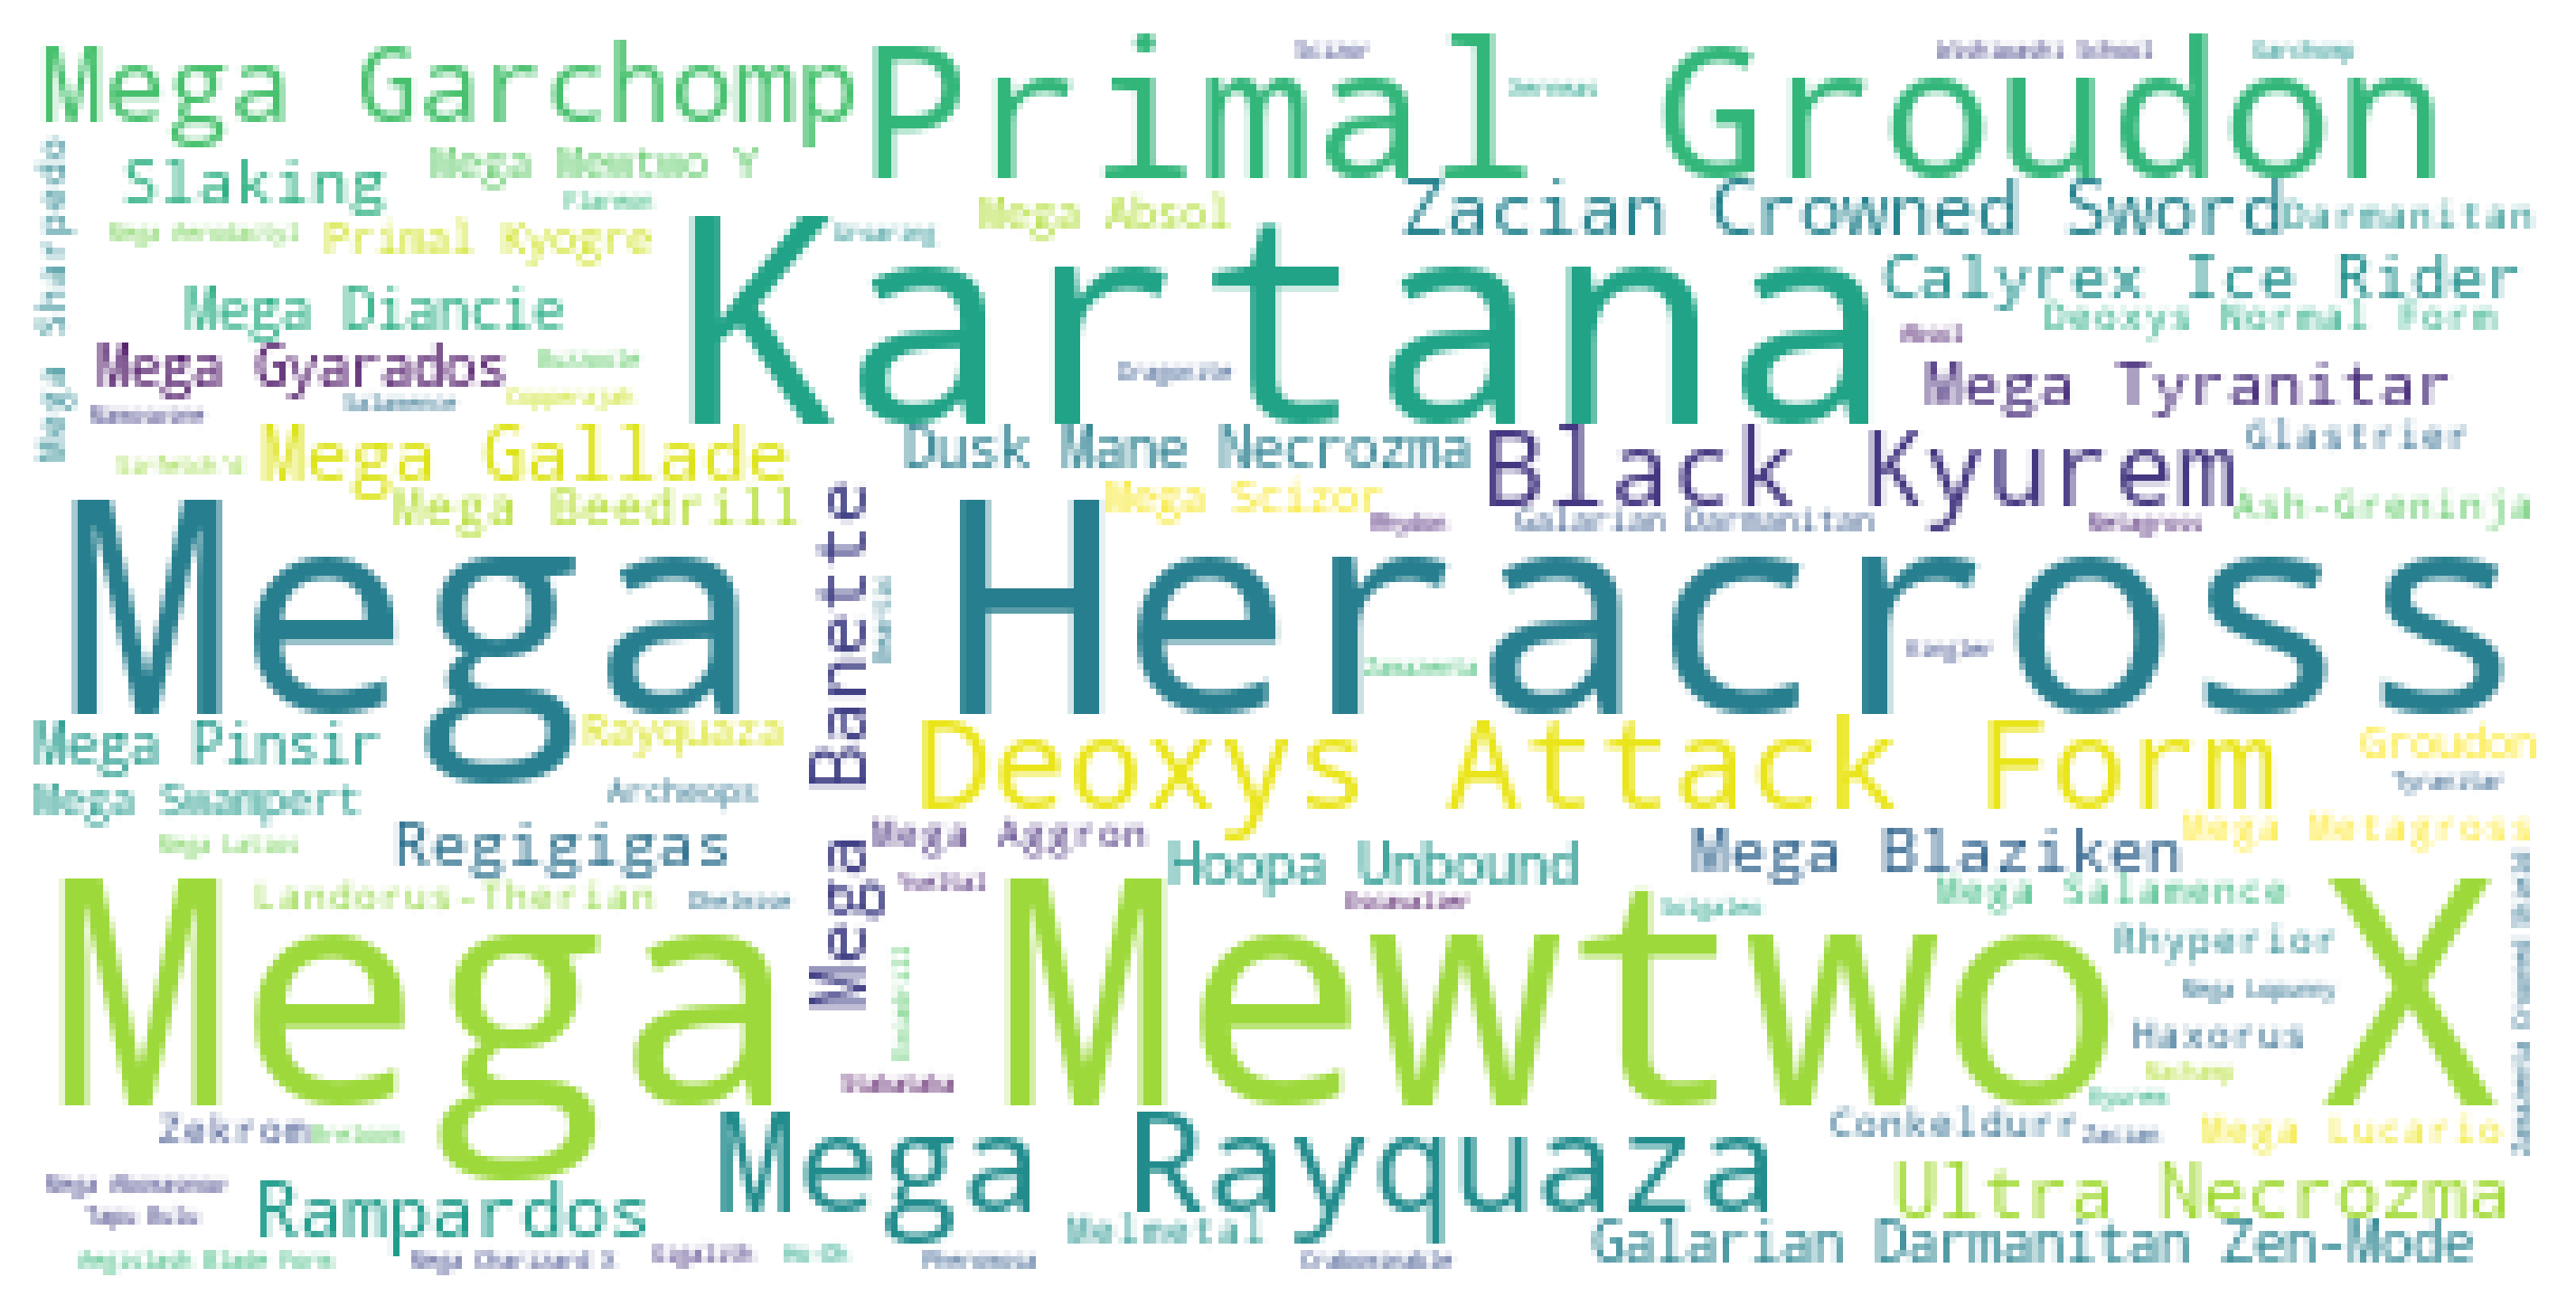

In [12]:
wordcloud = WordCloud(max_font_size=50, max_words=df.size, background_color="white").generate_from_frequencies(lista)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Que gráfico interessante, não? Mostra muito mais pokemons do que um gráfico de barras mostraria, e deixa bem claro quais pokemons são mais poderosos, pelo menos no que diz respeito ao ataque.

Antes de encerrar, mais um truque da biblioteca wordcloud: fazer a plotagem do gráfico seguindo o formato de uma imagem.

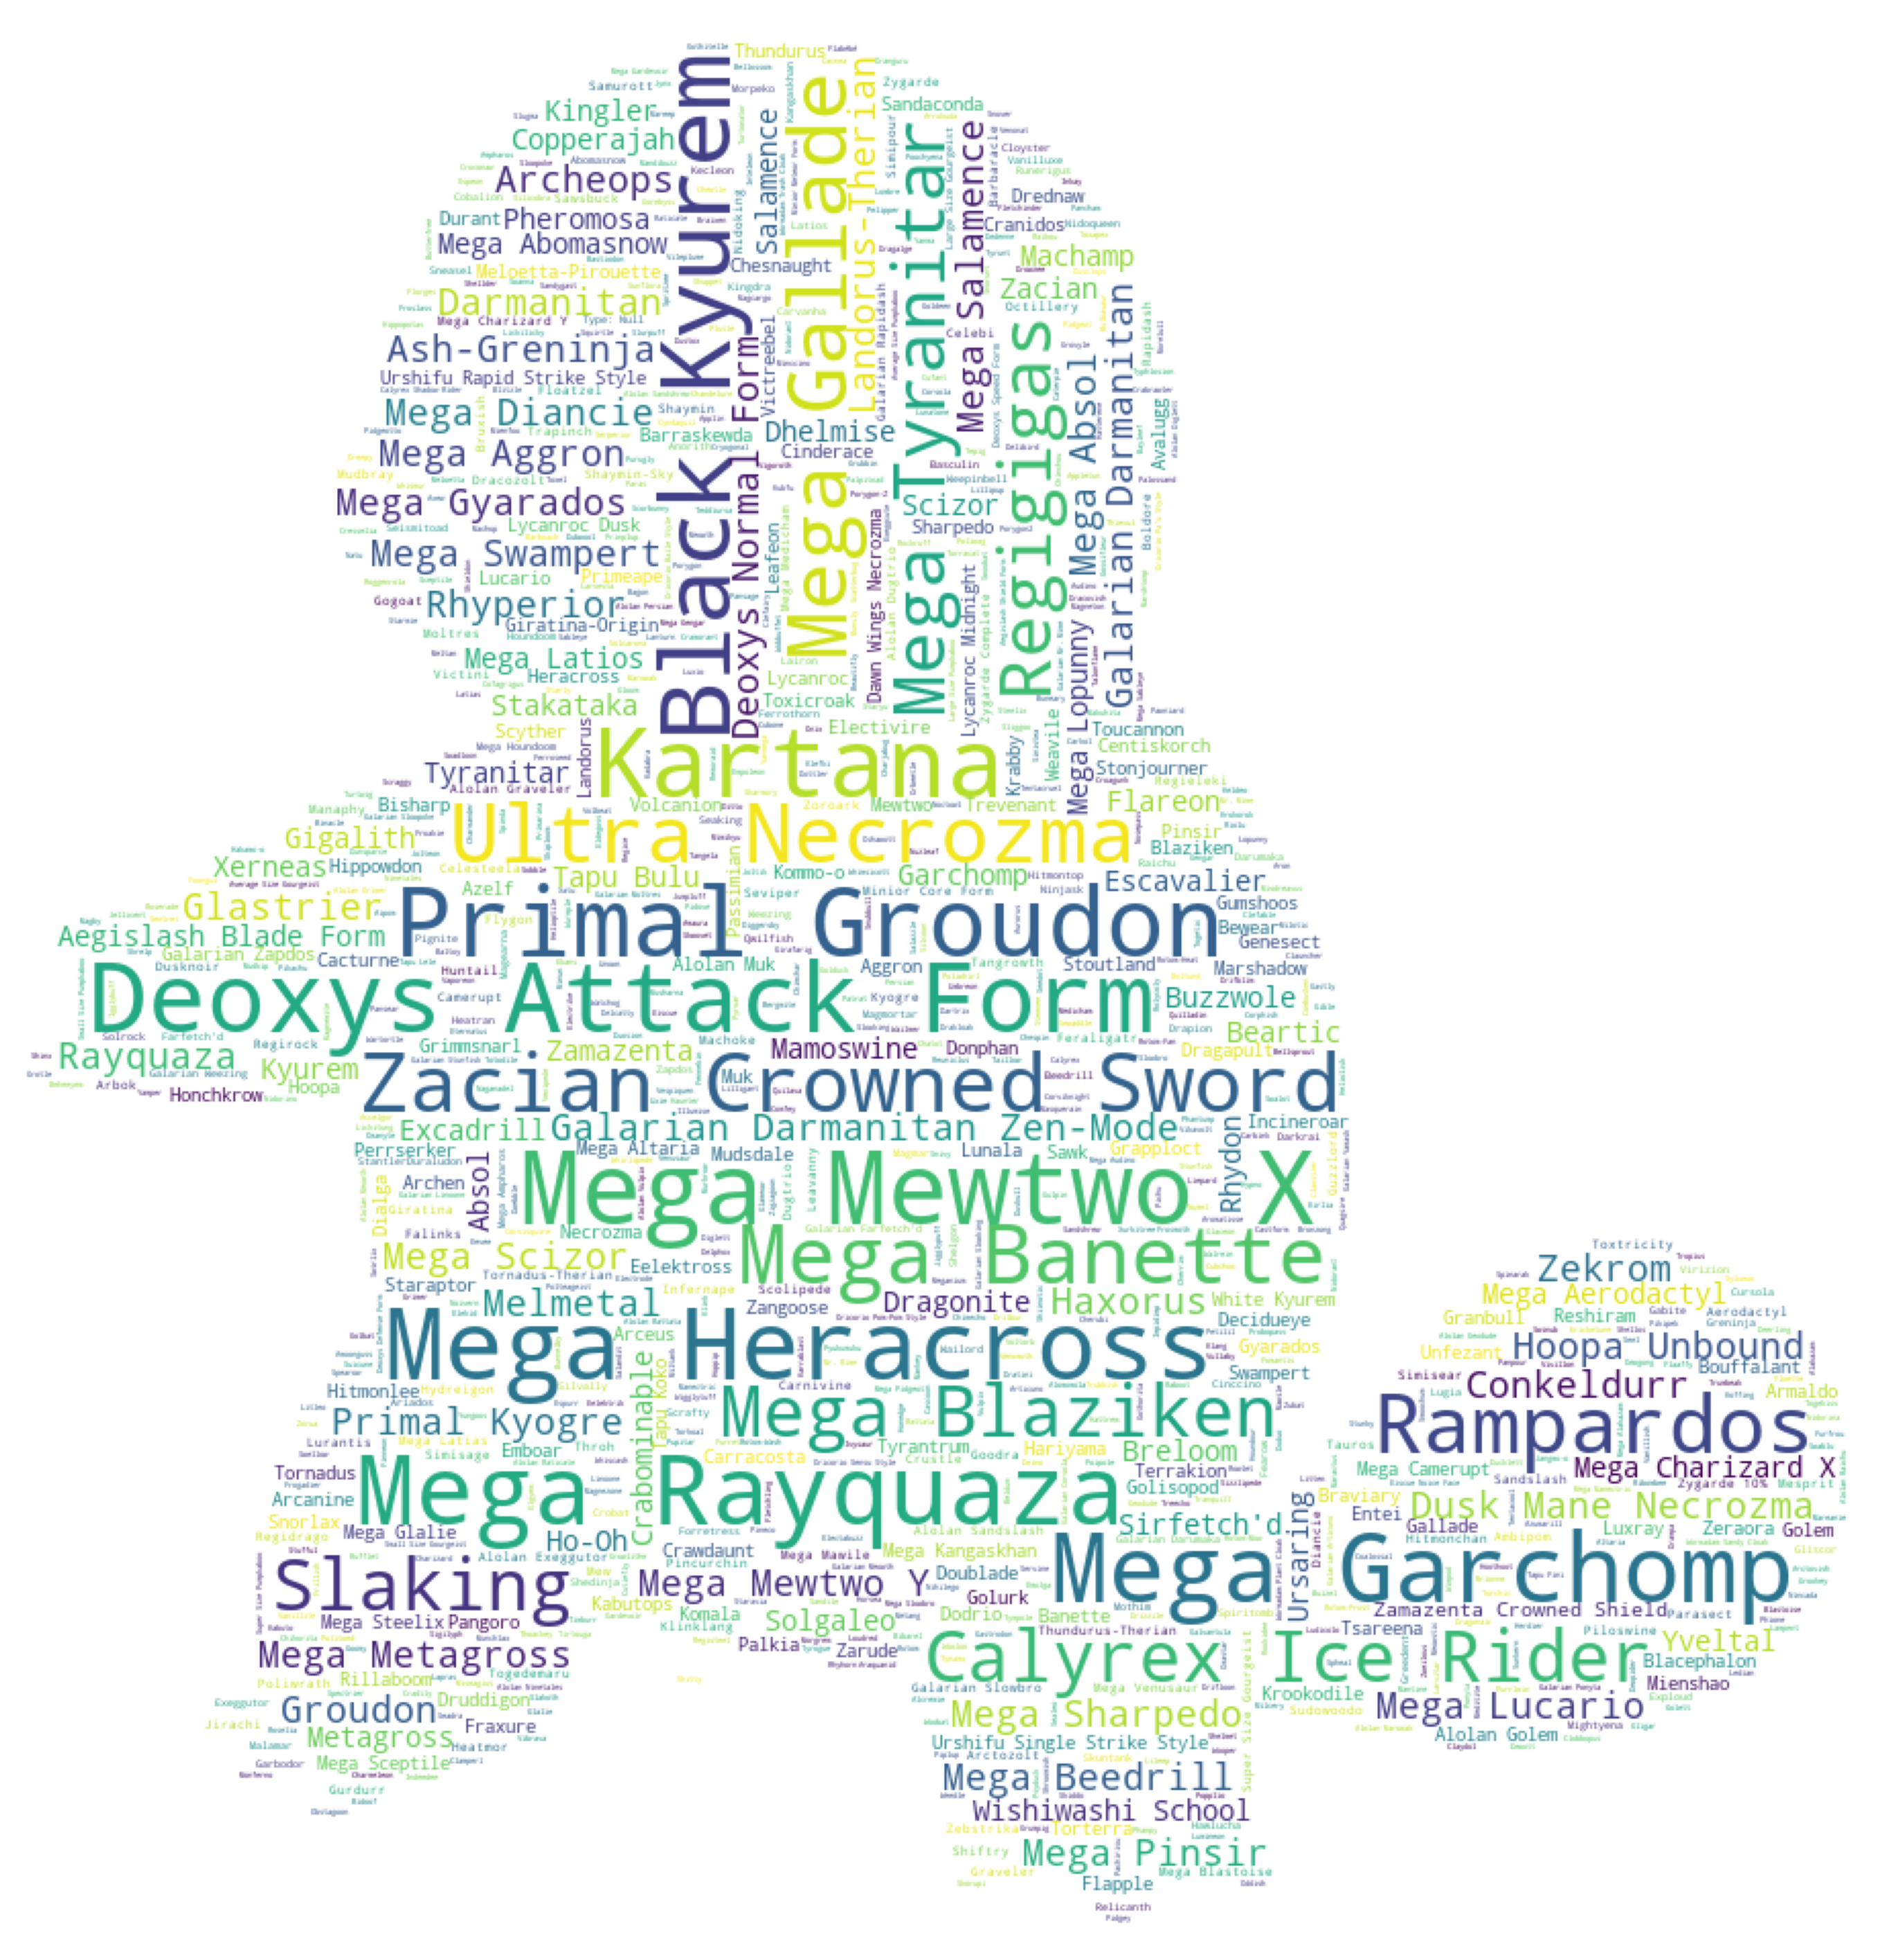

In [13]:
import numpy as np
from PIL import Image

mask = np.array(Image.open("squirtle.jpg"))
wordcloud = WordCloud(max_font_size=50, max_words=df.size, background_color="white", mask=mask).generate_from_frequencies(lista)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Agora sim, uma wordcloud de respeito!

## Conclusão

Nesta aula aprendemos a plotar mais um tipo de gráfico, utilizando uma nova biblioteca. Se quiser mais detalhes sobre a biblioteca wordcloud, clique [aqui](https://amueller.github.io/word_cloud/index.html).

Esta também é nossa última aula falando de gráficos e bibliotecas que podemos utilizar. Nas próximas aulas, iremos explorar novamente a biblioteca pandas e também aprofundar nosso conhecimento na biblioteca plotly.
